<a href="https://colab.research.google.com/github/hanYijin/python_Machine_learning_study/blob/main/003_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [5]:
#길이가 50인 농어의 무게 예측
print(knr.predict([[50]]))

[1033.33333333]


**k-최근접 이웃 회귀의 한계**

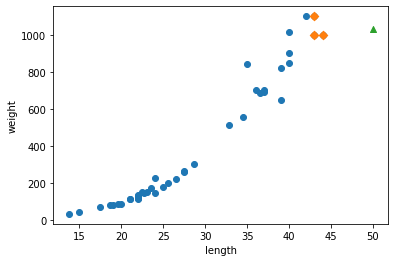

In [6]:
import matplotlib.pyplot as plt
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [9]:
print(knr.predict([[100]]))

[1033.33333333]


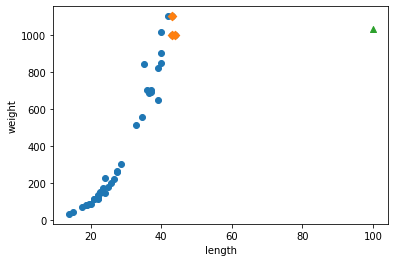

In [7]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

100cm의 큰 물고리의 샘플이 없기 때문

k-최근접 이웃은 기존의 샘플에서 이웃한 평균에서 타킷값을 구하므로 최대값이 제한되는 단점이 있다.
즉, 훈련 세트 범위를 벗어난 값을 예측하기가 어렵다
훈련세트 범위내의 이웃한 샘플을 기준으로 예측하기 때문이다.

**선형 회귀(linear regression)**

회귀는 연속적인 타깃을 예측하는 알고리즘

그 중에 선형 회귀Linear Regression가 가장 기본이다

*로지스틱 회귀, 신경망 알고리즘은 선형회귀 기반으로 한 모델이다

선형 회귀는 훈련 데이터에 가장 잘 들어 맞는 선형 방정식

latex.png

를 찾는 문제입니다

In [8]:
from sklearn.linear_model import  LinearRegression
lr = LinearRegression()
# 선형회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [9]:
print(lr.coef_,lr.intercept_)#기울기와 y절편
#학습된 모델의 속성(파라미터)은 일반 속성과 비교하기 위해 속성(파라미터) 끝에 _ 

[39.01714496] -709.0186449535477


y= ax + b (1차 방정식)

농어 무게(y) = a * 농어길이(x) + b
a는 기울기(가중치), b는 절편(y축과 만나는 지점)

LinearRegression 클래스가 구한 모델 파라미터는 가중치와 절편이 coef_와 intercept_ 인스턴스 변수에 따로 저장되어 있습니다.

coef_ 가중치, 기울기는 배열형태로 반환
특성마다 다른 기울기, 가중치의 계수를 지님으로 
현재는 길이 특성 하나에 대한 기울기(계수)이다.

**학습한 직선 그리기**

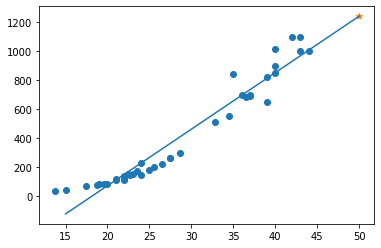

In [10]:
import matplotlib.pyplot as plt

#훈련 세트의 산점도 그리기
plt.scatter(train_input,train_target) #x축 길이, y축 무게

#15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 물고기 데이터
plt.scatter(50,1241.8, marker='*')
plt.show()

In [15]:
print('선형회귀 훈련 세트 예측 점수 : ',lr.score(train_input,train_target))
print('테스트 세트 예측 점수: ', lr.score(test_input,test_target))

선형회귀 훈련 세트 예측 점수 :  0.9398463339976039
테스트 세트 예측 점수:  0.8247503123313558


k-최근점이웃 모델과 비교시 최소적합

선형 회귀 훈련세트와 테스트 세트의 예측 점수를 비교하였을 때는 모델이 훈련 세트에 최대적합되었다 판단할 수 있다.

어떤 모델이 최대적합, 최소적합 되었는 지 상대적으로 비교하기 위해 여러 모델을 실험을 통해 알아볼 수 있다.


결과: 물고기 길이 15cm일때 무게가 음수의 결과를 예측하고 있다 
y 절편(lr.intercept_)의 값이 음수로 나오고 있다

훈련세트의 산점도를 보아도 굴곡진 2차 함수의 형태를 볼 수 있다.

**다항 회귀**

이차방정식 (다항식)
y = ax^2 + bx + c

무게 = a 길이^2 + b 길이 + c

길이 제곱을 한 2차원 배열 추가하여 열이 2개인 2차원 배열로 만들어 훈련 세트로 만든다


In [12]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly= np.column_stack((test_input ** 2, test_input))

In [13]:
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50 **2 , 50]]))

[1573.98423528]


In [14]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


y= 1.01x^2 -21.6x + 116.05 의 2차 함수를 훈련한 모델

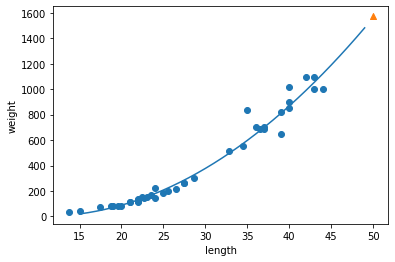

In [15]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
print('다항 회귀 훈련 세트 점수: ',lr.score(train_poly,train_target))
print('다항 회귀 테스트 세트 점수: ',lr.score(test_poly,test_target))

다항 회귀 훈련 세트 점수:  0.9706807451768623
다항 회귀 테스트 세트 점수:  0.9775935108325122
